In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
in_data = loadmat('bucky.mat')
A = in_data['A']

rows, cols = np.array(A.shape)

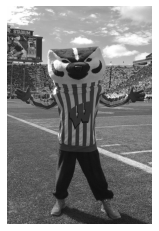

In [3]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

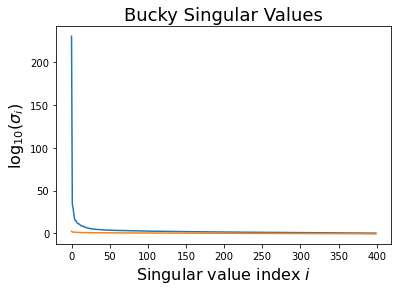

In [4]:
# Bucky's singular values
U,s,VT = np.linalg.svd(A,full_matrices=False)

fig = plt.figure()
ax = fig.add_subplot(111)
# original sigma
ax.plot(s)
# log sigma
# Reason: log of the singular values helps make the smaller ones distinct form zero
ax.plot(np.log10(s))

ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()

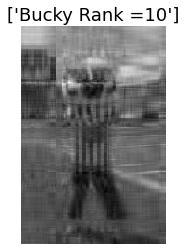

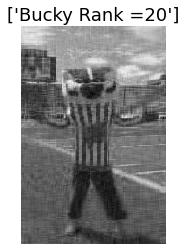

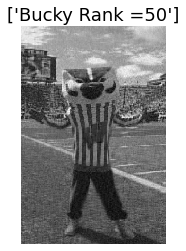

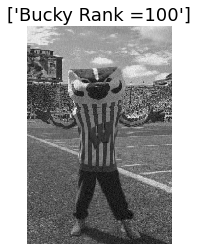

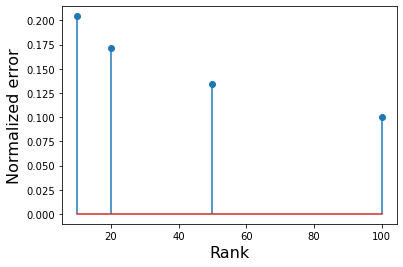

In [14]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100 ])
err_fro = np.zeros(len(r_vals)) #[0., 0., 0., 0.]

# display images of various rank approximations
for i, r in enumerate(r_vals): # [0, 10] [1, 20] [2 50] [3 100]

    Ar = U[:,0:r]@np.diag(s[0:r])@VT[0:r,:] # Sigma_{i = 1} ^ r sigma_i u_i v^T_i
    Er = A - Ar
    err_fro[i] = np.linalg.norm(Er,ord='fro') # frobenius norm of the error
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =' + str(r_vals[i])], fontsize=18)
    plt.show()
    
# plot normalized error versus rank / fractional squared error
norm_err = err_fro/np.linalg.norm(A,ord='fro')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()

# conclusion: the major feature of the image are captured pretty well by r = 50

In [16]:
np.arange(400)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

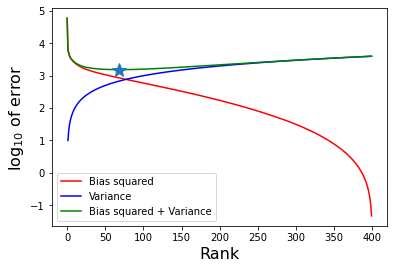

In [17]:
# bias-variance tradeoff
num_sv = min(rows, cols) # 400 = min (600, 400)

bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

# get the bias
for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2  # \Sigma_{i = r + 1} ^ N {sigma_i^2}


sigma2 = 10  # Variance of each row of the Noice Matrix G
var = sigma2*ranks # the approximation matrix's variance from noise
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

In [22]:
# add noise to the original image

# Anoise = A + np.sqrt(sigma2 / 600) * np.random.randn(np.shape(A)[0]).reshape(600, 400)
# Note:
# sigma/600 is the variance per dimension, not per row
# np.shape(A) => 600
# np.random.randn Return a sample (or samples) from the "standard normal" distribution.